In [1]:
import numpy as np
np.random.seed(0)

import pandas as pd

In [2]:
def get_data():
    df = pd.read_csv('data.csv', header=None, skiprows=1)

    # just in case you're curious what's in it
    # df.head()

    # easier to work with numpy array
    data = df.values

    # shuffle it
    np.random.shuffle(data)

    # split features and labels
    X = data[:,:-1]
    Y = data[:,-1].astype(np.int32)

    # one-hot encode the categorical data
    # create a new matrix X2 with the correct number of columns
    N, D = X.shape
    X2 = np.zeros((N, D+3))
    X2[:,0:(D-1)] = X[:,0:(D-1)] # non-categorical

    # one-hot
    for n in range(N):
        t = int(X[n,D-1])
        X2[n,t+D-1] = 1

    # method 2
    # Z = np.zeros((N, 4))
    # Z[np.arange(N), X[:,D-1].astype(np.int32)] = 1
    # # assign: X2[:,-4:] = Z
    # assert(np.abs(X2[:,-4:] - Z).sum() < 1e-10)

    # assign X2 back to X, since we don't need original anymore
    X = X2

    # split train and test
    Xtrain = X[:-100]
    Ytrain = Y[:-100]
    Xtest = X[-100:]
    Ytest = Y[-100:]

    # normalize columns 1 and 2
    for i in (1, 2):
        m = Xtrain[:,i].mean()
        s = Xtrain[:,i].std()
        Xtrain[:,i] = (Xtrain[:,i] - m) / s
        Xtest[:,i] = (Xtest[:,i] - m) / s

    return Xtrain, Ytrain, Xtest, Ytest


def get_binary_data():
    # return only the data from the first 2 classes
    Xtrain, Ytrain, Xtest, Ytest = get_data()
    Xtrain = Xtrain[Ytrain <= 1]
    Ytrain = Ytrain[Ytrain <= 1]
    Xtest = Xtest[Ytest <= 1]
    Ytest = Ytest[Ytest <= 1]
    
    # print(Xtest)
    
    return Xtrain, Ytrain, Xtest, Ytest


In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [4]:
def forward(X, W, b):
    return sigmoid( (X @ W) + b)

In [5]:
def classificationRate(y, yHat):
    return np.mean(y == yHat)

In [6]:
def crossEntropy(y, yHat):
    return -np.mean( y*np.log(yHat) + (1-y)*np.log(1-yHat) )

In [7]:
Xtrain, Ytrain, Xtest, Ytest = get_binary_data()

In [22]:
D = Xtrain.shape[1]    # 8
w = np.random.randn(D) # 8,1
b = 0 # bias term

In [23]:
w

array([ 0.39904635, -2.77259276,  1.95591231,  0.39009332, -0.65240858,
       -0.39095338,  0.49374178, -0.11610394])

In [27]:
trainCost = []
testCost  = []

lr = 0.001

for i in range(1000):
    pYtrain = forward(Xtrain, w, b)
    pYtest  = forward(Xtest,  w, b)
    
    ctrain = crossEntropy(Ytrain, pYtrain)
    ctest = crossEntropy(Ytest, pYtest)
    
    trainCost.append(ctrain)
    testCost.append(ctest)    
    
    w = w - lr * (Xtrain.T @ (pYtrain - Ytrain))
    b = b - lr * (pYtrain - Ytrain).sum()
    # print(w)
    

In [38]:
print("Final train classification_rate:", classificationRate(Ytrain, np.round(pYtrain)))
print("Final test classification_rate:", classificationRate(Ytest, np.round(pYtest)))

Final train classification_rate: 0.9746031746031746
Final test classification_rate: 0.963855421686747


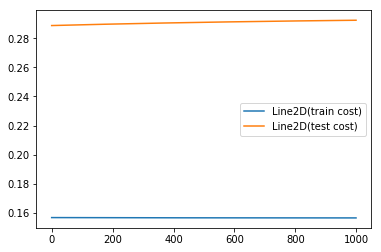

In [39]:
import matplotlib.pyplot as plt

legend1, = plt.plot(trainCost, label='train cost')
legend2, = plt.plot(testCost, label='test cost')
plt.legend([legend1, legend2])
plt.show()